In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Harneet Kaur\Downloads\used_cars_data (1) (1).xlsx")

In [3]:
df = df.dropna(axis = 1, how = 'all', thresh = 50000)

In [4]:
df.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'listing_id',
       'longitude', 'main_picture_url', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power',
       'price', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name',
       'theft_title', 'transmission', 'transmission_display', 'trimId',
       'trim_name', 'wheel_system', 'wheel_system_display', 'year',
       'seller_ID', 'wheelbase', 'width', 'length', 'height', 'RPM'],
      dtype='object')

In [5]:





# Select the relevant columns
columns = ['horsepower', 'RPM', 'city_fuel_economy', 'highway_fuel_economy', 'length', 'width', 'height']
data = df[columns]


In [6]:
data

horsepower     RPM  city_fuel_economy  highway_fuel_economy  length  \
0           177.0  1750.0                NaN                   NaN   166.6   
1           246.0  1400.0                NaN                   NaN   181.0   
2           305.0  4000.0               17.0                  23.0   180.9   
3           340.0  3500.0                NaN                   NaN   195.1   
4           246.0  1400.0                NaN                   NaN   181.0   
...           ...     ...                ...                   ...     ...   
99994       252.0  2000.0               26.0                  30.0   182.3   
99995       420.0  4100.0               16.0                  22.0   231.7   
99996       240.0  1450.0               19.0                  25.0   187.4   
99997       248.0  1500.0               24.0                  31.0   194.6   
99998       280.0  4700.0               19.0                  26.0   196.5   

       width  height  
0       79.6    66.5  
1       85.6    68.0  
2       78.9    58.1  
3       87.4    73.0  
4       85.6    68.0  
...      ...     ...  
99994   72.4    65.4  
99995   81.2    75.5  
99996   74.4    66.5  
99997   83.7    58.2  
99998   78.6    70.6  

[99999 rows x 7 columns]

In [7]:

# Handle missing values 
data = data.dropna()

# Normalize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-means clustering
n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)


# Analyze the clusters
for i in range(n_clusters):
    cluster_data = data[data['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Number of cars: {len(cluster_data)}")
    print(cluster_data.describe())


Cluster 0:
Number of cars: 22597
         horsepower           RPM  city_fuel_economy  highway_fuel_economy  \
count  22597.000000  22597.000000       22597.000000          22597.000000   
mean     250.282383   4385.565783          19.299863             26.067885   
std       61.911238    496.478887           2.266324              2.745068   
min      112.000000   2300.000000           8.000000             12.000000   
25%      182.000000   4000.000000          18.000000             25.000000   
50%      268.000000   4400.000000          19.000000             26.000000   
75%      295.000000   4800.000000          21.000000             28.000000   
max      630.000000   6800.000000          28.000000             34.000000   

             length         width        height  cluster  
count  22597.000000  22597.000000  22597.000000  22597.0  
mean     187.129522     76.693636     65.751653      0.0  
std        9.479299      4.560562      4.630519      0.0  
min      147.700000     65.

C:\Users\Harneet Kaur\AppData\Local\Temp\ipykernel_28048\1238773270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data_scaled)


In [8]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')

In [9]:
print("Silhoutte score for this clustering is ", score)

Silhoutte score for this clustering is  0.2728590636590067


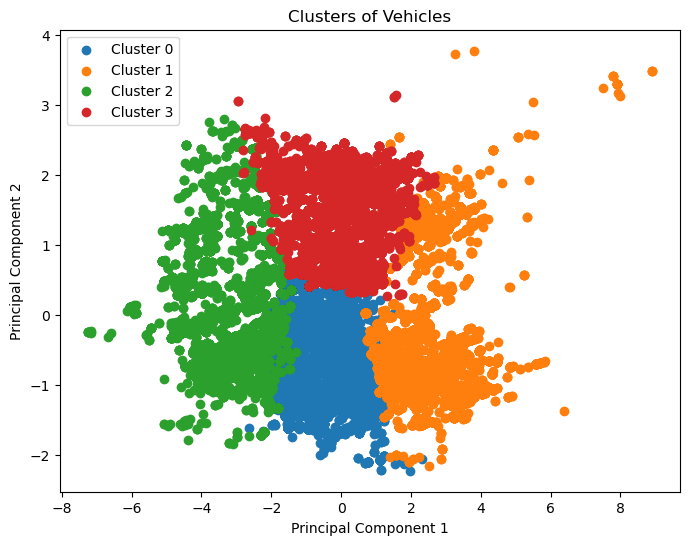

In [10]:

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(data_2d[data['cluster'] == i, 0], data_2d[data['cluster'] == i, 1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Clusters of Vehicles')
plt.show()


In [11]:
horsepower = []
RPM = []
city_fuel_economy = []
highway_fuel_economy = []
length = []
width = []
height = []

In [12]:
cluster_data = data[data['cluster'] == 0]

In [13]:
# Analyze the clusters
for i in range(n_clusters):
    cluster_data = data[data['cluster'] == i]
    horsepower.append(cluster_data.describe()['horsepower']['mean'])
    RPM.append(cluster_data.describe()['RPM']['mean'])
    city_fuel_economy.append(cluster_data.describe()['city_fuel_economy']['mean'])
    highway_fuel_economy.append(cluster_data.describe()['highway_fuel_economy']['mean'])
    length.append(cluster_data.describe()['length']['mean'])
    width.append(cluster_data.describe()['width']['mean'])
    height.append(cluster_data.describe()['height']['mean'])
    

<BarContainer object of 4 artists>

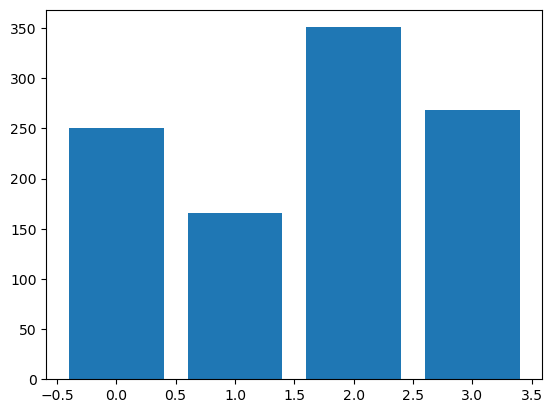

In [14]:
plt.bar([0,1,2,3],horsepower)

<BarContainer object of 4 artists>

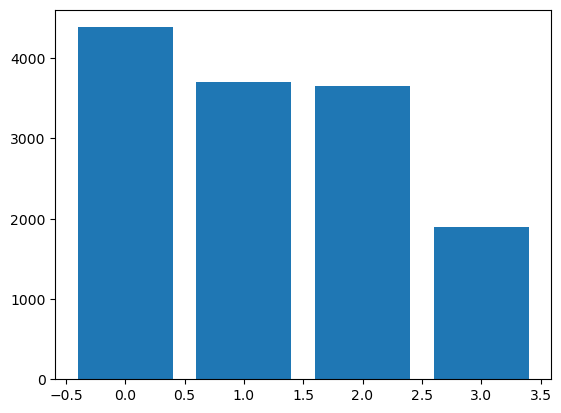

In [15]:
plt.bar([0,1,2,3],RPM)

<BarContainer object of 4 artists>

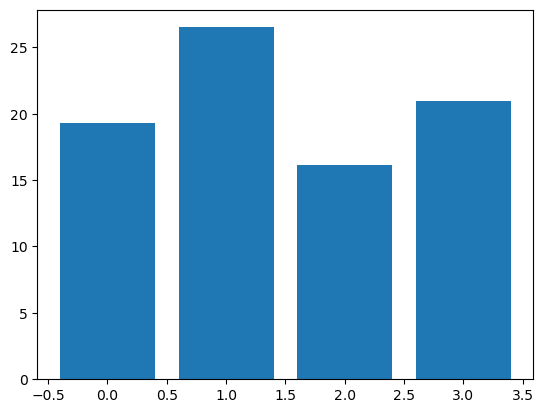

In [16]:
plt.bar([0,1,2,3],city_fuel_economy)

<BarContainer object of 4 artists>

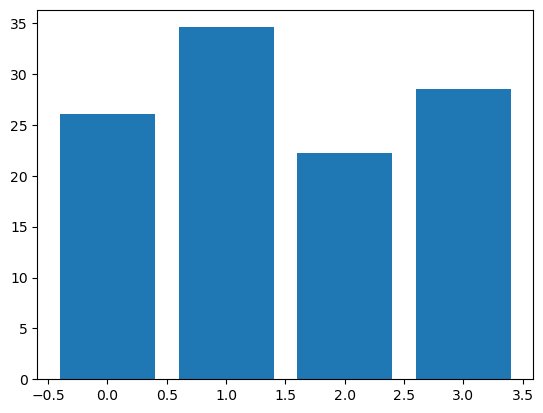

In [17]:
plt.bar([0,1,2,3],highway_fuel_economy)

In [18]:
plt.bar([0,1,2,3],height)

<BarContainer object of 4 artists>

In [19]:
plt.bar([0,1,2,3],width)

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

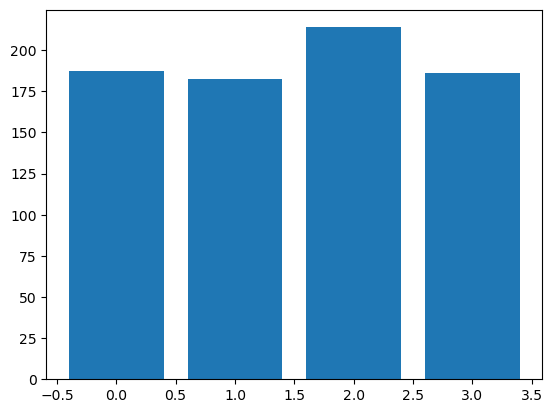

In [20]:
plt.bar([0,1,2,3],length)